
# Standardized Assessments v. Graduation Rate


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

## Define local path, file names, and lists

In [2]:
#LOCAL PATH
local_path = "/Users/Rowland/Downloads/"

# FILE NAMES ###################################
math_1415 = "math-achievement-lea-sy2014-15.csv"
math_1314 = "math-achievement-lea-sy2013-14.csv"
math_1213 = "math-achievement-lea-sy2012-13.csv"
math_1112 = "math-achievement-lea-sy2011-12.csv"
math_1011 = "math-achievement-lea-sy2010-11.csv"

rla_1415 = "rla-achievement-lea-sy2014-15.csv"
rla_1314 = "rla-achievement-lea-sy2013-14.csv"
rla_1213 = "rla-achievement-lea-sy2012-13.csv"
rla_1112 = "rla-achievement-lea-sy2011-12.csv"
rla_1011 = "rla-achievement-lea-sy2010-11.csv"

grad_1415 = "acgr-lea-sy2014-15.csv"
grad_1314 = "acgr-lea-sy2013-14.csv"
grad_1213 = "acgr-lea-sy2012-13.csv"
grad_1112 = "acgr-lea-sy2011-12.csv"
grad_1011 = "acgr-lea-sy2010-11.csv"

# NAME LISTS
ls_filename_math = [math_1415, math_1314, math_1213, math_1112, math_1011]
ls_filename_rla = [rla_1415, rla_1314, rla_1213, rla_1112, rla_1011]
ls_filename_grad = [grad_1415, grad_1314, grad_1213, grad_1112, grad_1011]
year = [2015, 2014, 2013, 2012, 2011]

## Math files clean-up

In [3]:
# GENERATE MATH DATA
for i in range(len(ls_filename_math)):
    path = local_path + ls_filename_math[i]
    #print path
    pre = pd.read_csv(path)
    if i>2:
        m='ALL_MTH00numvalid_'
        n='ALL_MTH00pctprof_'
        q='leanm'
        o=str(14-i)
    else:
        m='ALL_MTH00NUMVALID_'
        n='ALL_MTH00PCTPROF_'
        q='LEANM'
        o=''
    if i==0:
        k='1415'
    elif i==1:
        k='1314'
    elif i==2:
        k='1213'
    elif i==3:
        k='1112'
    elif i==4:
        k='1011'
#     elif i==5:
#         k='0910'
#         o="09"
    df_prof = pre[['STNAM', 'FIPST', 'LEAID', q + o, m + k, n + k]]
    col_names = ['state_name', 'state_id', 'district_id', 'district_name', 'total_student_assessment', 'percent_math']
    df_prof.columns = col_names
    df_prof['year']=year[i]
    #print "################################################"
    #print df_prof.tail(1)
    if i==0:
        math = df_prof
    else:
        math = math.append(df_prof, ignore_index=True)

/Users/Rowland/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21,25,215,219,221,225) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Rowland/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Rowland/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,20,24,222) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Rowland/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Col

In [4]:
# replace range values with approximations
######
# make a better replacement rule based on the meta
val_replace = ["6-9","10-14","11-19","15-19","20-24","20-29","21-39","25-29","30-34","30-39","35-39","40-44","40-49","40-59","45-49","50-54","50-59","55-59","60-64","60-69","60-79","65-69","70-74","70-79","80-84","80-89","85-89","90-94","GE50","GE80","GE90","GE95","GE99","LE1","LE10","LE20","LE5","LT50","n/a","PS","75-79"]
val_assign = ["7.5","12","15","17","22","24.5","30","27","32","34.5","37","42","44.5","49.5","47","52","54.5","57","62","64.5","69.5","67","72","74.5","82","84.5","87","92","50","80","90","95","99","1","10","20","5","50","NAN","NAN","77"]

In [5]:
for i in range(len(val_replace)):
    math['percent_math'] = math['percent_math'].replace(val_replace[i],val_assign[i])

In [6]:
# math.columns.values
# pd.set_option('display.max_rows', len(math))
# print math['percent_math'].value_counts().all

In [7]:
# assign percent_math datatype to float
math['percent_math'] = math['percent_math'].astype(float)

In [8]:
math.to_csv(local_path+'math.csv', index=False)

In [9]:
# GENERATE READ/WRITE DATA
for i in range(len(ls_filename_rla)):
    path = local_path + ls_filename_rla[i]
    #print path
    pre = pd.read_csv(path)
    if i>1:
        m='ALL_RLA00numvalid_'
        n='ALL_RLA00pctprof_'
        q='leanm'
        o=str(14-i)
    else:
        m='ALL_RLA00NUMVALID_'
        n='ALL_RLA00PCTPROF_'
        q='LEANM'
        o=''
    if i==0:
        k='1415'
    elif i==1:
        k='1314'
    elif i==2:
        k='1213'
        q='LEANM'
        o=''
    elif i==3:
        k='1112'
    elif i==4:
        k='1011'
#     elif i==5:
#         k='0910'
#         o="09"
    df_prof = pre[['STNAM', 'FIPST', 'LEAID', q + o, m + k, n + k]]
    col_names = ['state_name', 'state_id', 'district_id', 'district_name', 'total_student_assessment', 'percent_rla']
    df_prof.columns = col_names
    df_prof['year']=year[i]
    #print "################################################"
    #print df_prof.tail(1)
    if i==0:
        read = df_prof
    else:
        read = read.append(df_prof, ignore_index=True)

/Users/Rowland/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Rowland/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Rowland/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20,24,216) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
for i in range(len(val_replace)):
    read['percent_rla'] = read['percent_rla'].replace(val_replace[i],val_assign[i])

## Clean up Grad Data

In [11]:
# GENERATE GRAD DATA
for i in range(len(ls_filename_grad)):
    path = local_path + ls_filename_grad[i]
    #print path
    pre = pd.read_csv(path)
    if i==0:
        k='1415'
    elif i==1:
        k='1314'
    elif i==2:
        k='1213'
    elif i==3:
        k='1112'
    elif i==4:
        k='1011'
    df_grad = pre[['STNAM', 'FIPST', 'LEAID', 'LEANM', 'ALL_RATE_' + k]]
    col_names = ['state_name', 'state_id', 'district_id', 'district_name', 'percent_grad']
    df_grad.columns = col_names
    df_grad['year']=year[i]
    #print "################################################"
    #print df_prof.tail(1)
    if i==0:
        grad = df_grad
    else:
        grad = grad.append(df_grad, ignore_index=True)

/Users/Rowland/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
for i in range(len(val_replace)):
    grad['percent_grad'] = grad['percent_grad'].replace(val_replace[i],val_assign[i])

In [13]:
grad['percent_grad'] = grad['percent_grad'].astype(float)

## Merge Dataframes

In [14]:
df = pd.merge(math, grad, on = ['state_name', 'state_id', 'district_id','district_name','year'])
df = pd.merge(df, read, on = ['state_name', 'state_id', 'district_id','district_name','year'])

In [15]:
df.head()

,state_name,state_id,district_id,district_name,total_student_assessment_x,percent_math,year,percent_grad,total_student_assessment_y,percent_rla
0,ALABAMA,1,100005,Albertville City,2527,35.0,2015,91.0,2514,32
1,ALABAMA,1,100006,Marshall County,2993,35.0,2015,91.0,2988,36
2,ALABAMA,1,100007,Hoover City,7440,61.0,2015,93.0,7434,61
3,ALABAMA,1,100008,Madison City,5237,69.0,2015,97.0,5232,70
4,ALABAMA,1,100011,Leeds City,939,33.0,2015,87.0,939,39


In [16]:
df.to_csv(local_path+'edgov.csv', index=False)

## Correlation

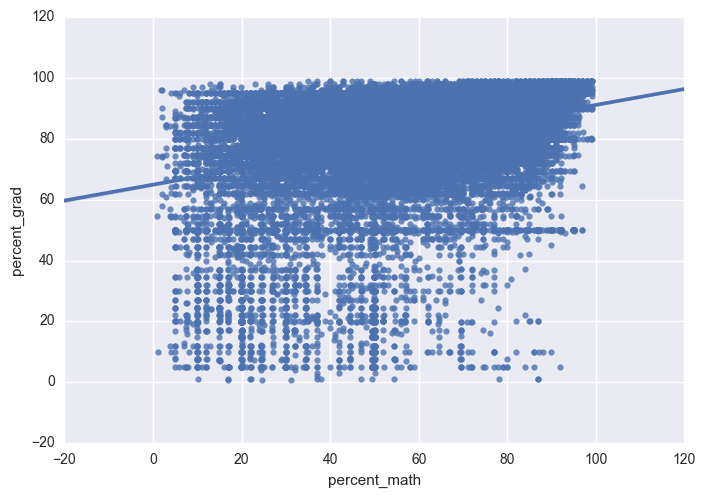

In [17]:
import seaborn as sns
sns.regplot(df['percent_math'], df['percent_grad'], x_jitter=0.1, y_jitter=0.1)

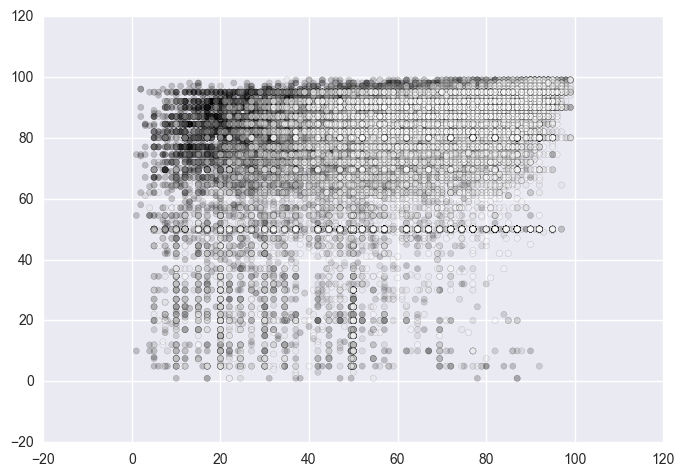

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['percent_math'], df['percent_grad'], c=df['year'], alpha=0.2)
# plt.gray()

plt.show()

In [34]:
import bokeh
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()

In [29]:
import shapefile
dat = shapefile.Reader("/Users/Rowland/Downloads/SCHOOLDISTRICT_SY1314_TL15/schooldistrict_sy1314_tl15.shp")